# <center> <font color=#154360>MODEL DEVELOPMENT
    
- Continuation to Feature Engineering and EDA

---
# **Table of Contents**
---

**1.** [**Installing & Importing Libraries**](#Section1)<br>
**2.** [**Loading Data**](#Section2)<br>

**3.** [**Data Acquisition & Description**](./DataCleaning.ipynb)<br>
**4.** [**Data Pre-Processing**](./DataCleaning.ipynb)<br>
**5.** [**Find Missing Values Mean to know Percentage**](./FeatureEngineering.ipynb)<br>

**6.** [**Feature Engineering Steps**](#./FeatureEngineering.ipynb)<br>
**7.** [**Test Data Pre-Processing and Post-Processing**](#./FeatureEngineering.ipynb)<br>

**8.** [**Exploratory Data Analysis**](./EDA.ipynb)<br>
**9.** [**Summarization**](./EDA.ipynb)<br>

**10.** [**Model Development and Evaluation**](#Section10)<br>
  - **10.1** [**Model Development & Evaluation without Tuning**](#Section101)<br>
  - **10.2** [**Hyperparameter Tuning**](#Section102)<br>
  - **10.3** [**Model Development & Evaluation after Tuning**](#Section103)<br>
  - **10.4** [**Cross-Validating the Models**](#Section104)<br>
  - **10.5** [**Model Comparison**](#Section105)<br>
  
**11.** [**Predicting Probabilities of Unseen Test Data**](#Section11)<br>
**12.** [**Saving to Predictions.csv file**](#Section12)<br>

<a name = Section1></a>
## **1. Installing & Importing Libraries**

In [15]:
!pip install xgboost

In [31]:
# Toolbox for Measuring Machine Performance   
!pip install -q yellowbrick 
!pip install imblearn
!pip install Counter


####  Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go                                      # Importing plotly for interactive visualizations

#----------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To perform train, test and split over the data
#----------------------------------------------------------------


from sklearn.neighbors import KNeighborsClassifier                                 # To instantiate a KNN Classifier
from sklearn.naive_bayes import GaussianNB                                         # To instantiate a Naive Bayes Classifier

#--------------------------------------------------------------
from sklearn.feature_selection import SelectFromModel               # To perform Feature Selection over model
from yellowbrick.model_selection import FeatureImportances          # To retrieve Feature Importances over model
from sklearn.decomposition import PCA
#-----------------------------------------------------------------

from sklearn.linear_model import LogisticRegression                 # To perform modeling using LogisticRegression
from sklearn.svm import SVC                                         # To perform modeling using SVC
from sklearn.tree import DecisionTreeClassifier                     # To perform modeling using DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier                 # To perform modeling using RandomForestClassifier
from sklearn.ensemble import VotingClassifier                       # To perform modeling using VotingClassifier
from sklearn.ensemble import BaggingClassifier                      # To perform modeling using BaggingClassifier 
from sklearn.ensemble import AdaBoostClassifier                     # To perform modeling using AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier             # To perform modeling using GradientBoostingClassifier
from xgboost import XGBClassifier


from sklearn.ensemble import StackingClassifier                     # To perform modeling using StackingClassifier
#-------------------------------------------------------------------------------------------------------------------------------
import time                                                         # Importing to calculate time
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once


#-------------------------------------------------------------
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation

from sklearn.model_selection import KFold                                          # CrossValidation 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate                  # To calculate cross validation scores

# -----------------------------------------
from imblearn.combine import SMOTETomek                             # To balance the imbalanced class
from collections import Counter

<a name=Section2></a>
## 2.**Loading Data**

In [2]:
X_train=pd.read_csv('train_test\X_train.csv')

In [3]:
X_valid=pd.read_csv('train_test\X_valid.csv')

In [4]:
y_train=pd.read_csv('train_test\y_train.csv')

In [5]:
y_valid=pd.read_csv('train_test\y_valid.csv')

In [6]:
y_train=y_train.values.ravel()


In [7]:
y_valid=y_valid.values.ravel()

- ### Assumptions Check


In [8]:
temp_df = X_train.select_dtypes(exclude='object').copy()
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11292 entries, 0 to 11291
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   department_D00-ENG  11292 non-null  float64
 1   department_D00-FN   11292 non-null  float64
 2   department_D00-IT   11292 non-null  float64
 3   department_D00-MN   11292 non-null  float64
 4   department_D00-MT   11292 non-null  float64
 5   department_D00-PD   11292 non-null  float64
 6   department_D00-PR   11292 non-null  float64
 7   department_D00-SP   11292 non-null  float64
 8   department_D00-SS   11292 non-null  float64
 9   department_D00-TP   11292 non-null  float64
 10  department_missing  11292 non-null  float64
 11  salary_low          11292 non-null  float64
 12  salary_medium       11292 non-null  float64
 13  employee_id         11292 non-null  float64
 14  avg_monthly_hrs     11292 non-null  float64
 15  filed_complaint     11292 non-null  float64
 16  last

#### Distribution of classes

#### Multicollinearty

<AxesSubplot:>

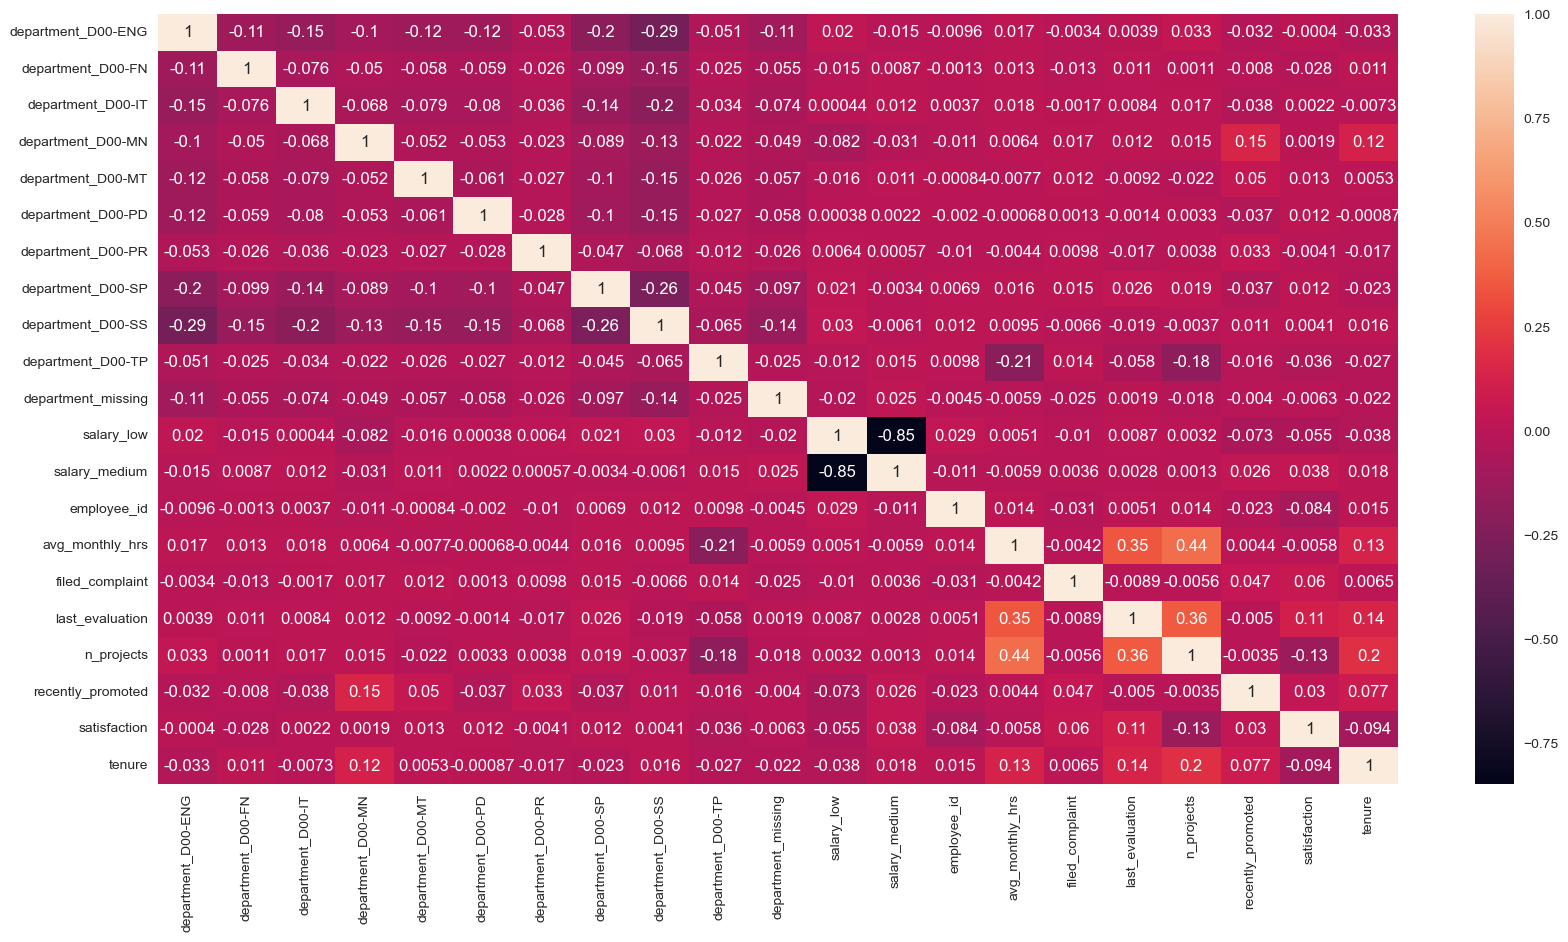

In [9]:
paper = plt.figure(figsize = [20,10])
sns.heatmap(X_train.corr(), annot = True)

- No multicolinearity , though from our EDA, we know there exists relation between avg_monthly_hrs and n_projects &
  avg_monthly_hrs and last_evaluation

- ### Feature Selection using DecisionTreeClassifier and Random Forest Classifier

 **Feature Selection using DecisionTreeClassifier**

In [13]:
# # Instantiating various classifiers
dtree = DecisionTreeClassifier(random_state = 42, class_weight='balanced')


  # Fit the model on train data
dtree.fit(X_train, y_train)

  # Make predictions using test data
preds_dtree_train = dtree.predict(X_train)

  # Make predictions using test data
preds_dtree_valid = dtree.predict(X_valid)



In [14]:
dict_impfeatures=dict(zip(X_train.columns, dtree.feature_importances_))
impfeatures_df=pd.Series(dict_impfeatures)
impfeatures_df.sort_values(ascending=False)

satisfaction          0.408369
tenure                0.255742
avg_monthly_hrs       0.100842
last_evaluation       0.087244
n_projects            0.069951
employee_id           0.057011
department_D00-ENG    0.004476
filed_complaint       0.002774
salary_medium         0.002403
department_D00-SP     0.002037
salary_low            0.001916
department_D00-TP     0.001744
department_D00-FN     0.001359
department_missing    0.001106
department_D00-MN     0.000937
department_D00-IT     0.000851
department_D00-SS     0.000777
department_D00-PR     0.000219
department_D00-MT     0.000210
recently_promoted     0.000021
department_D00-PD     0.000010
dtype: float64

In [13]:
X_train.columns

Index(['department_D00-ENG', 'department_D00-FN', 'department_D00-IT',
       'department_D00-MN', 'department_D00-MT', 'department_D00-PD',
       'department_D00-PR', 'department_D00-SP', 'department_D00-SS',
       'department_D00-TP', 'department_missing', 'salary_low',
       'salary_medium', 'employee_id', 'avg_monthly_hrs', 'filed_complaint',
       'last_evaluation', 'n_projects', 'recently_promoted', 'satisfaction',
       'tenure'],
      dtype='object')

------------
- Feature Selection using RandomForestClassifier

In [15]:
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(X_train, y_train)

# Extracting list of important features
selected_feat = X_train.columns[(selector.get_support())].tolist()

# Show total number of important features extracted by the model
print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance

print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Important Features:', selected_feat)

Total Features Selected are 6
Threshold set by Model: 0.05
Important Features: ['employee_id', 'avg_monthly_hrs', 'last_evaluation', 'n_projects', 'satisfaction', 'tenure']


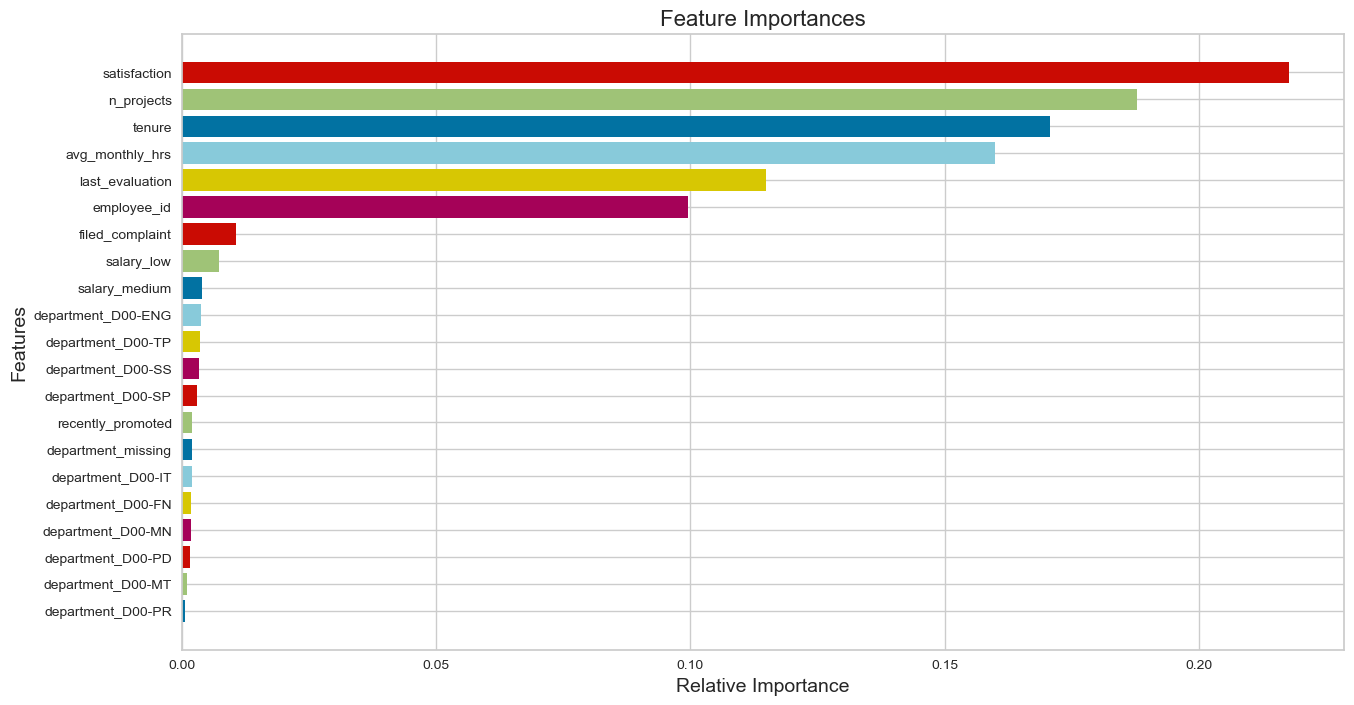

In [16]:
# Have some patience, may take some time :)
figure = plt.figure(figsize = [15, 8])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative = False)
viz.fit(X_train, y_train)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()

<a name=Section10></a>
## 10.**Model Development and Evaluation**


In [8]:
# Initialize classifiers
log_clf = LogisticRegression(random_state = 42, class_weight='balance')
knbr_clf=KNeighborsClassifier()
gnb_clf=GaussianNB()
sv_clf = SVC(random_state=42, class_weight='balanced', probability=True)
dt_clf = DecisionTreeClassifier(random_state = 42, class_weight='balanced')
bag_clf = BaggingClassifier(base_estimator=dt_clf, n_estimators=500, n_jobs=-1, random_state=42)
randf_clf = RandomForestClassifier(n_estimators=500, random_state = 42, class_weight='balanced', n_jobs=-1)
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', randf_clf), ('dt', dt_clf), ('svc', sv_clf)], voting='soft')
ada_clf = AdaBoostClassifier(base_estimator=dt_clf, n_estimators=500, random_state=42)
gb_clf = XGBClassifier(tree_method = "exact", predictor = "cpu_predictor", verbosity = 1)

- Fitting Models with Train Validation Datasets and appending Accuracy Scores for Comparison

In [9]:
%%time
# Intialize a list of classifier objects
clf_list = [log_clf,knbr_clf, gnb_clf, sv_clf, dt_clf, bag_clf, voting_clf, randf_clf, ada_clf, gb_clf]

# Create an empty list to append scores and classifier name
train_scores = []
test_scores = []
clf_names = []

# Train classifier over train data and append scores to empty list
for clf in clf_list:
  # Fit the train data over the classifier object
  clf.fit(X_train, y_train)

  # Append train and test score to the empty list
  train_scores.append(np.round(a=clf.score(X_train, y_train), decimals=2))
  test_scores.append(np.round(a=clf.score(X_valid, y_valid), decimals=2))
  clf_names.append(clf.__class__.__name__)

print('Success!')

Success!
Wall time: 2min 10s


### Comparing Accuracy Scores

In [10]:
# Create an accuracy dataframe from scores and names list
accuracy_frame = pd.DataFrame(data={'Train Accuracy': train_scores, 'Test Accuracy': test_scores}, index=clf_names)

# View the accuracy of all the classifiers
accuracy_frame.transpose()

,LogisticRegression,KNeighborsClassifier,GaussianNB,SVC,DecisionTreeClassifier,BaggingClassifier,VotingClassifier,RandomForestClassifier,AdaBoostClassifier,XGBClassifier
Train Accuracy,0.8,0.95,0.66,0.93,1.00,1.00,0.99,1.00,1.00,1.00
Test Accuracy,0.8,0.93,0.67,0.93,0.97,0.98,0.97,0.98,0.97,0.98


###  Checking Accuracy Score with Stacking Classifier

In [11]:
%%time

# Creating a collection of estimators
estimators = [('bc', BaggingClassifier(base_estimator=dt_clf, n_estimators=500, n_jobs=-1, random_state=42)), 
              ('gb_clf',  GradientBoostingClassifier(n_estimators=500, random_state = 42)),
              ('svc', SVC(class_weight='balanced', random_state=42, probability=True)),
              ('knn', KNeighborsClassifier(n_jobs=-1)),
              ('randomforest', RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42))]

# Setting StackingClassifier with initiated estimators and a final estimator
stack_clf = StackingClassifier(estimators=estimators, 
                               final_estimator=GradientBoostingClassifier(random_state=42), 
                               n_jobs=-1, cv=5)
stack_clf.fit(X_train, y_train)

# Display the accuracy on train data and test data
print('Accuracy on Train data:', np.round(a=stack_clf.score(X_train, y_train), decimals=2))
print('Accuracy on Test data:', np.round(a=stack_clf.score(X_valid, y_valid), decimals=2))

Accuracy on Train data: 1.0
Accuracy on Test data: 0.98
Wall time: 2min 36s


#### Evaluation Matrices

In [19]:
#Function Defintion to know Confusion Matrix, Classification Report and Accuracy Score

def model_evaluation(classifier ,xtrain,xtest,ytrain, ytest):
  classifier.fit(xtrain, ytrain)
  preds_clf_train=classifier.predict(xtrain)
  preds_clf_test=classifier.predict(xtest)
  print("Accuracy Score, Confusion Matrix and Classification Report for Train Data using classifier.__class__.__name__")
  acc_score=accuracy_score(ytrain, preds_clf_train)
  cm_matrix= confusion_matrix(ytrain, preds_clf_train)

  clas_rep=classification_report(ytrain, preds_clf_train)

  print('The accuracy of the model is:', round(acc_score,2))
  print(cm_matrix)
  print(clas_rep)
  ##########################################################

  print("Accuracy Score, Confusion Matrix and Classification Report for Train Data using"+ classifier.__class__.__name__)
  acc_score=accuracy_score(ytest, preds_clf_test)
  cm_matrix= confusion_matrix(ytest, preds_clf_test)

  clas_rep=classification_report(ytest, preds_clf_test)

  print('The accuracy of the model is:', round(acc_score,2))
  print(cm_matrix)
  print(clas_rep)

### 10.2 Evaluation Matrics for Random Forest
- Accuracy Score, Confusion Matrix and Classification Report 

In [27]:
model_evaluation(randf_clf ,X_train,X_valid,y_train, y_valid)

Accuracy Score, Confusion Matrix and Classification Report for Train Data using classifier.__class__.__name__
The accuracy of the model is: 1.0
[[8600    0]
 [   0 2692]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8600
           1       1.00      1.00      1.00      2692

    accuracy                           1.00     11292
   macro avg       1.00      1.00      1.00     11292
weighted avg       1.00      1.00      1.00     11292

Accuracy Score, Confusion Matrix and Classification Report for Train Data usingRandomForestClassifier
The accuracy of the model is: 0.98
[[2151   10]
 [  49  614]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2161
           1       0.98      0.93      0.95       663

    accuracy                           0.98      2824
   macro avg       0.98      0.96      0.97      2824
weighted avg       0.98      0.98      0.98      2824



### Evaluation Matrics for XGBClassifier
- Accuracy Score, Confusion Matrix and Classification Report 

In [28]:
model_evaluation(gb_clf ,X_train,X_valid,y_train, y_valid)

Accuracy Score, Confusion Matrix and Classification Report for Train Data using classifier.__class__.__name__
The accuracy of the model is: 1.0
[[8597    3]
 [  18 2674]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8600
           1       1.00      0.99      1.00      2692

    accuracy                           1.00     11292
   macro avg       1.00      1.00      1.00     11292
weighted avg       1.00      1.00      1.00     11292

Accuracy Score, Confusion Matrix and Classification Report for Train Data usingXGBClassifier
The accuracy of the model is: 0.98
[[2138   23]
 [  41  622]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2161
           1       0.96      0.94      0.95       663

    accuracy                           0.98      2824
   macro avg       0.97      0.96      0.97      2824
weighted avg       0.98      0.98      0.98      2824



### AUROC Curve - Comparison Between Random Forest and Voting Classifier
- Area Under the Receiver Operating Characteristics
- Graph plot between Sensitivity(True Positive Rate) ,1- specificity curve(False Negative Rate)
- AUROC Curve for RandomForest and Voting Classifier

In [39]:
randf_clf.fit(X_train, y_train)
y_pred_valid_rf=randf_clf.predict(X_valid)


In [40]:
voting_clf.fit(X_train, y_train)
y_pred_valid_vot=voting_clf.predict(X_valid)

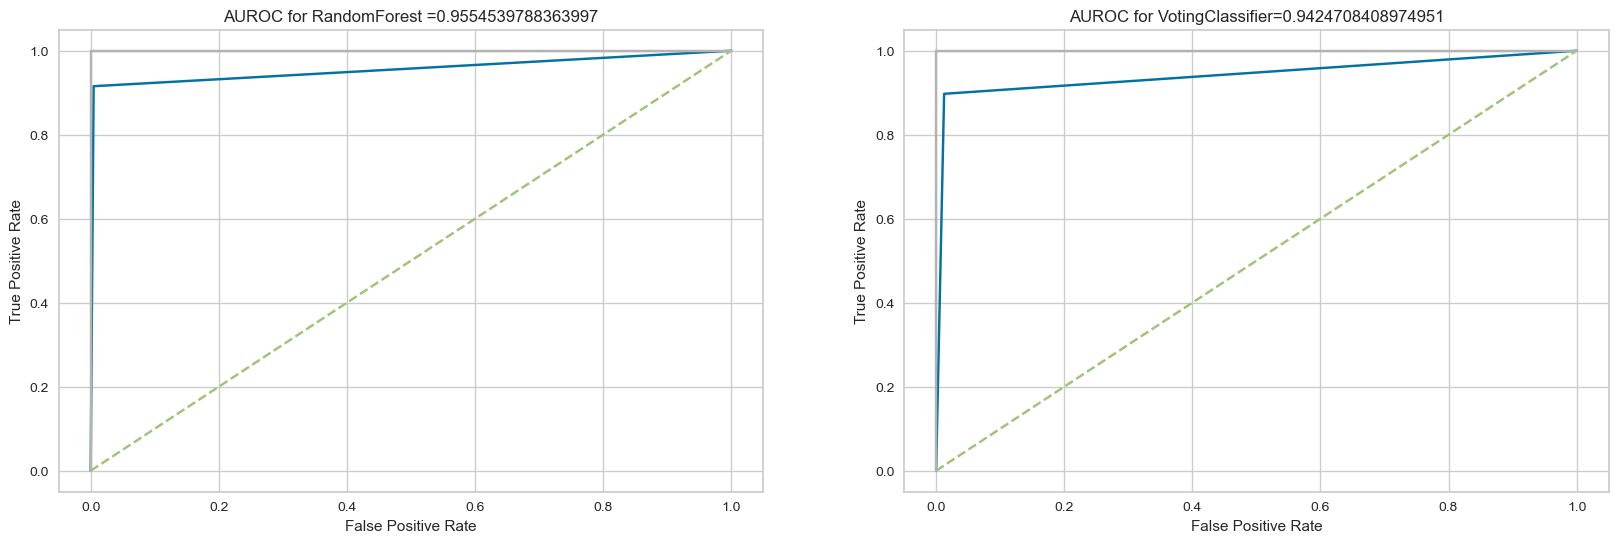

In [97]:
fpr_log,tpr_log,thres_log = roc_curve(y_valid,y_pred_valid_rf)
fpr_log1,tpr_log1,log_thres = roc_curve(y_valid,y_pred_valid_vot)

auc = metrics.roc_auc_score(y_valid, y_pred_valid_rf)
auc1 = metrics.roc_auc_score(y_valid, y_pred_valid_vot)
fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].plot(fpr_log,tpr_log, label="auc="+str(auc))
ax[0].plot([0, 1], ls="--")
ax[0].plot([0, 0], [1, 0] , c=".7")
ax[0].plot([1, 1] , c=".7")

ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_title('AUROC for RandomForest ='+str(auc))

ax[1].plot(fpr_log1,tpr_log1,label="auc="+str(auc1))
ax[1].plot([0, 1], ls="--")
ax[1].plot([0, 0], [1, 0] , c=".7")
ax[1].plot([1, 1] , c=".7")
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_title('AUROC for VotingClassifier='+str(auc1))
plt.show()

## Cross Validation before Tuning

In [41]:
# Creating list of cv scores
cv_train_scores = []
cv_test_scores = []
cv_test_mean = []

for clf in clf_list:

  # Extracting model name
  model_name = type(clf).__name__

  # Calculating scores using cross validation
  # Using KFold() with 5 folds
  scores = cross_validate(estimator=clf,
                          X=X_train,
                          y=y_train,
                          cv=KFold(n_splits=5), 
                          scoring='accuracy', return_train_score=True)

  # scores is a dictionary with keys like test_score, train_score, fit_time, etc
  # We will extract test_score and append it to our cv_scores list
  cv_train_scores.append(scores['train_score'])
  cv_test_scores.append(scores['test_score'])

  # Calculating the mean of scores for both the models
  cv_test_mean.append((scores['test_score'].mean()))

In [70]:
cross_val_tr=pd.DataFrame(cv_train_scores ,index=clf_names, columns=['Tr_f1','Tr_f2','Tr_f3','Tr_f4','Tr_f5']).sort_values(by='Tr_f1',ascending=False)

In [74]:
cross_val_test=pd.DataFrame(cv_test_scores ,index=clf_names, columns=['T_f1','T_f2','T_f3','T_f4','T_f5'])

In [75]:
cross_val_results=pd.concat([cross_val_tr, cross_val_test], axis=1)

In [76]:
# Printing Cross Validation Results
cross_val_results

,Tr_f1,Tr_f2,Tr_f3,Tr_f4,Tr_f5,T_f1,T_f2,T_f3,T_f4,T_f5
DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,0.961930,0.966799,0.963242,0.962799,0.968999
BaggingClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,0.975210,0.980522,0.981399,0.975642,0.980514
RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,0.975653,0.976981,0.980071,0.972985,0.976971
AdaBoostClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,0.962373,0.962815,0.963242,0.962799,0.969885
VotingClassifier,0.996790,0.996236,0.996126,0.996901,0.996569,0.968127,0.970784,0.974756,0.963242,0.972099
GradientBoostingClassifier,0.993358,0.993801,0.992473,0.994133,0.992916,0.977866,0.977866,0.981842,0.968999,0.980514
KNeighborsClassifier,0.930366,0.932359,0.930485,0.935245,0.933474,0.915892,0.908367,0.926041,0.897697,0.917183
SVC,0.924942,0.920735,0.923068,0.924950,0.921187,0.911908,0.925188,0.918069,0.899026,0.917626
LogisticRegression,0.771062,0.773719,0.769427,0.772858,0.767877,0.766268,0.764940,0.764393,0.759965,0.790523
GaussianNB,0.673088,0.678069,0.686186,0.672460,0.685079,0.659141,0.676848,0.670948,0.678477,0.695306


---------
<a name=Section102></a>
### 10.3Hyperparameter Tuning using GridSearch


In [ ]:
# Creating a parameter grid for Random Forest and KNN
param_grid_rfc = { 'n_estimators': [50, 100, 500, 1000],
                  'max_features': ['auto', 'sqrt', 'log2'],
                  'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10],
                  'criterion' :['gini', 'entropy']}

# param_grid_knn = {'n_neighbors': list(range(2, 20)),
#                   'metric': ['minkowski',],
#                   'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                   'p': list(range(1,6)),
#                   'weights': ["uniform", "distance"]}

param_grid_gb={"n_estimators":[5,50,250,500],
               "max_depth":[1,3,4,5,6,7,9,11, 13],
               "min_child_weight":[1,3,5,7],
               "learning_rate":[0.01,0.05, 0.10,0.15,0.20,0.25, 0.30],
               "gamma":[0.0,0.1,0.2,0.3,0.4],
               "colsample-bytree":[0.3,0.4,0.5,0.7]}

# Putting the parameters in a list
param_grid = [param_grid_rfc, param_grid_gb]

i = 0

# Creating lists to store scores, models and parameters
best_scores = []
best_models = []
best_params = []

# Instantiating models
clfs = [RandomForestClassifier(random_state=42, class_weight='balanced'),
        XGBClassifier(tree_method = "exact", predictor = "cpu_predictor", verbosity = 1)]

for clf in clfs:
  # Extracting model name
  model_name = type(clf).__name__

  # Applying GridSearchCV on the model
  cv = GridSearchCV(estimator=clf, param_grid=param_grid[i], cv= 5, n_jobs=-1)

  # Calculating start time
  start_time = time.time()

  # Fitting the model in train set
  cv.fit(X_train, y_train)

  # Calculating evaluated time
  evaluated_time = time.time()-start_time

  # Append best score, parameters and models in lists
  best_scores.append(cv.best_score_)
  best_params.append(cv.best_params_)
  best_models.append(cv.best_estimator_)

  # Print time taken for tuning
  print('Time taken for tuning', model_name ,' is: ', np.round(evaluated_time, 2), 'sec')
  print('----------------------------------------\n')
  i += 1

Time taken for tuning RandomForestClassifier  is:  19553.27 sec
----------------------------------------



In [19]:
best_scores

[0.9753809876133689, 0.9326069798161944]

In [20]:
best_params

[{'criterion': 'entropy',
  'max_depth': 10,
  'max_features': 'auto',
  'n_estimators': 1000},
 {'algorithm': 'auto',
  'metric': 'minkowski',
  'n_neighbors': 2,
  'p': 1,
  'weights': 'uniform'}]

In [21]:
best_models

[RandomForestClassifier(class_weight='balanced', criterion='entropy',
                        max_depth=10, n_estimators=1000, random_state=42),
 KNeighborsClassifier(n_jobs=-1, n_neighbors=2, p=1)]

<a name=Section103></a>
### Model Development & Evaluation after Tuning

In [23]:
randf_tune = RandomForestClassifier(criterion='entropy',max_depth=10, random_state = 42, n_estimators=1000, class_weight='balanced', n_jobs=-1)


In [24]:

randf_tune.fit(X_train, y_train)

  # Append train and test score to the empty list
print(randf_tune.score(X_train, y_train))
print(randf_tune.score(X_valid, y_valid))


0.9852107686857953
0.9752124645892352


In [20]:
model_evaluation(gb_clf ,X_train,X_valid,y_train, y_valid)

In [29]:
model_evaluation(randf_tune ,X_train,X_valid,y_train, y_valid)

Accuracy Score, Confusion Matrix and Classification Report for Train Data using classifier.__class__.__name__
The accuracy of the model is: 0.99
[[8546   54]
 [ 113 2579]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8600
           1       0.98      0.96      0.97      2692

    accuracy                           0.99     11292
   macro avg       0.98      0.98      0.98     11292
weighted avg       0.99      0.99      0.99     11292

Accuracy Score, Confusion Matrix and Classification Report for Train Data usingRandomForestClassifier
The accuracy of the model is: 0.98
[[2138   23]
 [  47  616]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2161
           1       0.96      0.93      0.95       663

    accuracy                           0.98      2824
   macro avg       0.97      0.96      0.97      2824
weighted avg       0.98      0.98      0.98      2824



In [ ]:
## Results did not Improve than before

<a name=Section=104></a>
### 10.4.Cross Validation After Tuning

In [ ]:
# Creating list of cv scores
cv_train_scores = []
cv_test_scores = []
cv_test_mean = []

for clf in best_models:

  # Extracting model name
  model_name = type(clf).__name__

  # Calculating scores using cross validation
  # Using KFold() with 5 folds
  scores = cross_validate(estimator=clf,
                          X=X_train,
                          y=y_train,
                          cv=KFold(n_splits=5), 
                          scoring='accuracy', return_train_score=True)

  # scores is a dictionary with keys like test_score, train_score, fit_time, etc
  # We will extract test_score and append it to our cv_scores list
  cv_train_scores.append(scores['train_score'])
  cv_test_scores.append(scores['test_score'])

  # Calculating the mean of scores for both the models
  cv_test_mean.append((scores['test_score'].mean()))

In [ ]:

bstcross_val_tr=pd.DataFrame(cv_train_scores ,index=clf_names, columns=['Tr_f1','Tr_f2','Tr_f3','Tr_f4','Tr_f5']).sort_values(by='Tr_f1',ascending=False)
bstcross_val_test=pd.DataFrame(cv_test_scores ,index=clf_names, columns=['T_f1','T_f2','T_f3','T_f4','T_f5'])
bstcross_val_results=pd.concat([cross_val_tr, cross_val_test], axis=1)
# Printing Cross Validation Results
bstcross_val_results

### The model could not improve even after tuning
 

- After comparing several Models, BASIC Random Forest is working fine
- Though Random Forest Algorithm does not get impacted due to imbalance in the data
- Still Treating for Imbalance using SMOTETommek technique and check results further

#### Treating DataSet for Imbalance

In [31]:

counter=Counter(y_train)
print("Before", counter)

smote=SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom=smote.fit_resample(X_train, y_train)
counter=Counter(y_train_smtom)
print("After", counter)

Before Counter({0: 8600, 1: 2692})
After Counter({1: 8565, 0: 8565})


---------
<a name=Section105></a>
### 10.5**Model Comparison after treating for Imbalance Dataset**

--------------
- Matrix for Random Forest

In [32]:
model_evaluation(randf_clf ,X_train_smtom,X_valid,y_train_smtom, y_valid)

Accuracy Score, Confusion Matrix and Classification Report for Train Data using classifier.__class__.__name__
The accuracy of the model is: 1.0
[[8565    0]
 [   0 8565]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8565
           1       1.00      1.00      1.00      8565

    accuracy                           1.00     17130
   macro avg       1.00      1.00      1.00     17130
weighted avg       1.00      1.00      1.00     17130

Accuracy Score, Confusion Matrix and Classification Report for Train Data usingRandomForestClassifier
The accuracy of the model is: 0.98
[[2143   18]
 [  42  621]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2161
           1       0.97      0.94      0.95       663

    accuracy                           0.98      2824
   macro avg       0.98      0.96      0.97      2824
weighted avg       0.98      0.98      0.98      2824



------------
- Matrix for XGBoost

In [34]:
model_evaluation(gb_clf ,X_train_smtom,X_valid,y_train_smtom, y_valid)

Accuracy Score, Confusion Matrix and Classification Report for Train Data using classifier.__class__.__name__
The accuracy of the model is: 1.0
[[8555   10]
 [  17 8548]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8565
           1       1.00      1.00      1.00      8565

    accuracy                           1.00     17130
   macro avg       1.00      1.00      1.00     17130
weighted avg       1.00      1.00      1.00     17130

Accuracy Score, Confusion Matrix and Classification Report for Train Data usingXGBClassifier
The accuracy of the model is: 0.98
[[2133   28]
 [  41  622]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2161
           1       0.96      0.94      0.95       663

    accuracy                           0.98      2824
   macro avg       0.97      0.96      0.97      2824
weighted avg       0.98      0.98      0.98      2824



----------------
- Matrix for Logistic Regression

In [35]:
model_evaluation(log_clf ,X_train_smtom,X_valid,y_train_smtom, y_valid)

Accuracy Score, Confusion Matrix and Classification Report for Train Data using classifier.__class__.__name__
The accuracy of the model is: 0.79
[[6519 2046]
 [1615 6950]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      8565
           1       0.77      0.81      0.79      8565

    accuracy                           0.79     17130
   macro avg       0.79      0.79      0.79     17130
weighted avg       0.79      0.79      0.79     17130

Accuracy Score, Confusion Matrix and Classification Report for Train Data usingLogisticRegression
The accuracy of the model is: 0.77
[[1656  505]
 [ 141  522]]
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      2161
           1       0.51      0.79      0.62       663

    accuracy                           0.77      2824
   macro avg       0.71      0.78      0.73      2824
weighted avg       0.82      0.77      0.79      2824



------------
- Matrix for Voting Classifier

In [89]:
model_evaluation(voting_clf ,X_train_smtom,X_valid,y_train_smtom, y_valid)

Accuracy Score, Confusion Matrix and Classification Report for Train Data using classifier.__class__.__name__
The accuracy of the model is: 1.0
[[8519   42]
 [  22 8539]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8561
           1       1.00      1.00      1.00      8561

    accuracy                           1.00     17122
   macro avg       1.00      1.00      1.00     17122
weighted avg       1.00      1.00      1.00     17122

Accuracy Score, Confusion Matrix and Classification Report for Train Data usingVotingClassifier
The accuracy of the model is: 0.96
[[2100   61]
 [  43  620]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2161
           1       0.91      0.94      0.92       663

    accuracy                           0.96      2824
   macro avg       0.95      0.95      0.95      2824
weighted avg       0.96      0.96      0.96      2824



-------
- Matrix for Bagging Classifier

In [91]:
model_evaluation(bag_clf ,X_train_smtom,X_valid,y_train_smtom, y_valid)

Accuracy Score, Confusion Matrix and Classification Report for Train Data using classifier.__class__.__name__
The accuracy of the model is: 1.0
[[8561    0]
 [   0 8561]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8561
           1       1.00      1.00      1.00      8561

    accuracy                           1.00     17122
   macro avg       1.00      1.00      1.00     17122
weighted avg       1.00      1.00      1.00     17122

Accuracy Score, Confusion Matrix and Classification Report for Train Data usingBaggingClassifier
The accuracy of the model is: 0.97
[[2127   34]
 [  46  617]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2161
           1       0.95      0.93      0.94       663

    accuracy                           0.97      2824
   macro avg       0.96      0.96      0.96      2824
weighted avg       0.97      0.97      0.97      2824



-----
- Matrix for Gaussian Naive Bias

In [90]:
model_evaluation(gnb_clf ,X_train_smtom,X_valid,y_train_smtom, y_valid)

Accuracy Score, Confusion Matrix and Classification Report for Train Data using classifier.__class__.__name__
The accuracy of the model is: 0.61
[[2502 6059]
 [ 631 7930]]
              precision    recall  f1-score   support

           0       0.80      0.29      0.43      8561
           1       0.57      0.93      0.70      8561

    accuracy                           0.61     17122
   macro avg       0.68      0.61      0.57     17122
weighted avg       0.68      0.61      0.57     17122

Accuracy Score, Confusion Matrix and Classification Report for Train Data usingGaussianNB
The accuracy of the model is: 0.44
[[ 636 1525]
 [  54  609]]
              precision    recall  f1-score   support

           0       0.92      0.29      0.45      2161
           1       0.29      0.92      0.44       663

    accuracy                           0.44      2824
   macro avg       0.60      0.61      0.44      2824
weighted avg       0.77      0.44      0.44      2824



#### **Random Forest outperformed all others** - 
- Model is performing slightly better after treating for Class imbalance 

### Loading Unseen Test Data

In [76]:
unseen_Xtest = pd.read_csv("unseen\X_test.csv")
tosave_res=pd.read_csv("unseen\employee_id.csv")

- Fitting the Balanced Class Data  to random forest Model
- Predict Results

<a name = Section11></a>
  
### 11.**Predicting Probabilities of Unseen Test Data**

In [77]:
X_train_smtom,X_valid,y_train_smtom, y_valid
randf_clf.fit(X_train_smtom, y_train_smtom)
preds_clf_train=randf_clf.predict(X_valid)


In [78]:
pred_test = randf_clf.predict(unseen_Xtest)


In [79]:
pred_prob = randf_clf.predict_proba(unseen_Xtest)[:,1]

In [82]:
tosave_res['pred_test'] = df_x=pd.DataFrame({'pred_test':pred_test})

In [83]:
tosave_res['pred_prob'] = df_x=pd.DataFrame({'pred_prob':pred_prob})

In [73]:
unseen_Xtest

,department_D00-ENG,department_D00-FN,department_D00-IT,department_D00-MN,department_D00-MT,department_D00-PD,department_D00-PR,department_D00-SP,department_D00-SS,department_D00-TP,...,employee_id,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,pred_test,pred_prob
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.387506,0.325670,0.0,0.310995,0.166667,0.0,0.375359,0.125,1,1.000
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.247960,0.659004,0.0,0.684950,0.166667,0.0,0.749443,0.125,0,0.188
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.078201,0.409962,0.0,0.334893,0.166667,0.0,0.308672,0.125,1,0.992
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.119071,0.321839,0.0,0.656469,0.500000,0.0,0.825006,0.000,0,0.002
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.065375,0.329502,0.0,0.202482,0.166667,0.0,0.292279,0.375,0,0.476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.338843,0.812261,0.0,0.631676,0.500000,0.0,0.752656,0.125,0,0.012
96,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.129298,0.697318,1.0,0.508088,0.333333,0.0,0.646625,0.000,0,0.000
97,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.159306,0.432950,1.0,0.282508,0.500000,0.0,0.880750,0.125,0,0.002
98,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.358398,0.613027,0.0,0.365263,0.333333,0.0,0.584800,0.125,0,0.000


<a name = Section12></a>
### **12.Saving to Predictions.csv file**

In [86]:
tosave_res.to_csv('res_grp_1012\predictions.csv', header=False, index=False)